# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


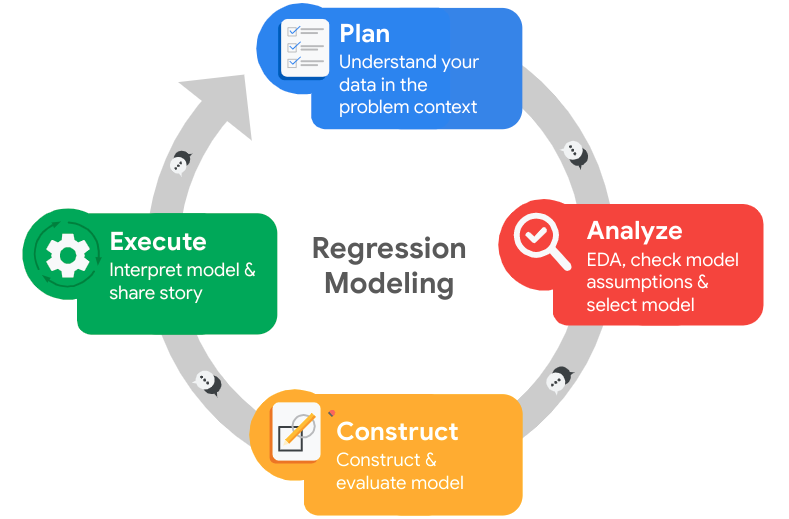

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
headers = ['satisfaction_level','last_evaluation','number_project','avg_hours','time_spend','work_accident','left','promotion','Department','salary']

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.columns = headers

# Display all column names after the update
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,avg_hours,time_spend,work_accident,left,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df0.head()

,satisfaction_level,last_evaluation,number_project,avg_hours,time_spend,work_accident,left,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level    0
last_evaluation       0
number_project        0
avg_hours             0
time_spend            0
work_accident         0
left                  0
promotion             0
Department            0
salary                0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
df0[df0.duplicated()].count()

satisfaction_level    3008
last_evaluation       3008
number_project        3008
avg_hours             3008
time_spend            3008
work_accident         3008
left                  3008
promotion             3008
Department            3008
salary                3008
dtype: int64

In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated(keep=False)].sort_values(by='last_evaluation').head(10)

,satisfaction_level,last_evaluation,number_project,avg_hours,time_spend,work_accident,left,promotion,Department,salary
13711,0.49,0.36,2,192,3,0,0,0,sales,low
11119,0.19,0.36,3,167,5,0,0,0,sales,low
13379,0.17,0.36,6,191,2,0,0,0,product_mng,medium
11500,0.49,0.36,2,192,3,0,0,0,sales,low
13330,0.19,0.36,3,167,5,0,0,0,sales,low
11168,0.17,0.36,6,191,2,0,0,0,product_mng,medium
12888,0.52,0.37,2,118,2,0,0,0,product_mng,high
12974,0.28,0.37,3,164,4,1,0,0,accounting,low
13669,0.71,0.37,2,179,5,0,0,1,support,low
11337,0.65,0.37,3,170,6,0,0,0,IT,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,avg_hours,time_spend,work_accident,left,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   satisfaction_level  11991 non-null  float64
 1   last_evaluation     11991 non-null  float64
 2   number_project      11991 non-null  int64  
 3   avg_hours           11991 non-null  int64  
 4   time_spend          11991 non-null  int64  
 5   work_accident       11991 non-null  int64  
 6   left                11991 non-null  int64  
 7   promotion           11991 non-null  int64  
 8   Department          11991 non-null  object 
 9   salary              11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Check outliers

Check for outliers in the data.

In [13]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,avg_hours,time_spend,work_accident,left,promotion
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


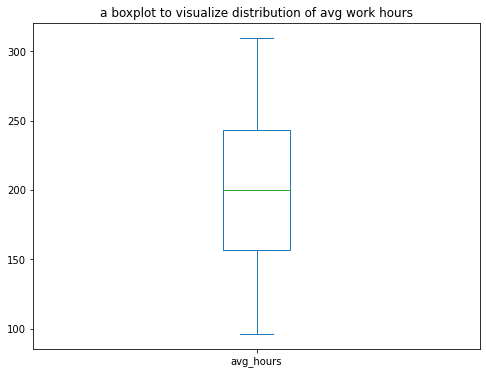

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
df0['avg_hours'].plot(kind='box', figsize=(8, 6))
plt.title('a boxplot to visualize distribution of avg work hours')

plt.show()

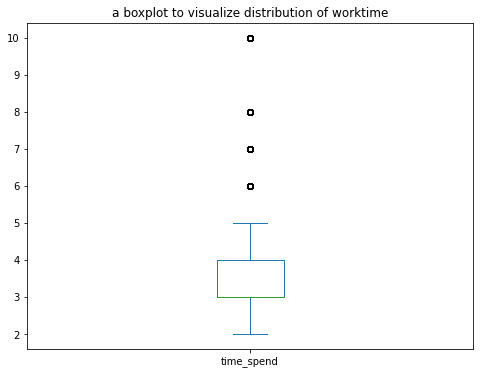

In [15]:
df0['time_spend'].plot(kind='box', figsize=(8, 6))
plt.title('a boxplot to visualize distribution of worktime')

plt.show()

In [16]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
Q1 = df0['time_spend'].quantile(0.25)
Q3 = df0['time_spend'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 找出低于 Q1 - 1.5 * IQR 或高于 Q3 + 1.5 * IQR 的异常值
outliers = df0[(df0['time_spend'] < lower_bound) | (df0['time_spend'] > upper_bound)]
print(outliers)

       satisfaction_level  last_evaluation  number_project  avg_hours  \
1                    0.80             0.86               5        262   
17                   0.78             0.99               4        255   
34                   0.84             0.87               4        246   
47                   0.57             0.70               3        273   
67                   0.90             0.98               4        264   
...                   ...              ...             ...        ...   
11994                0.22             0.94               3        193   
11995                0.90             0.55               3        259   
11996                0.74             0.95               5        266   
11997                0.85             0.54               3        185   
11998                0.33             0.65               3        172   

       time_spend  work_accident  left  promotion   Department  salary  
1               6              0     1          0 

In [17]:
df0.to_csv('df0.csv', index=False, encoding='utf-8')

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [18]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
group1 = df0['left'].value_counts()
print(group1)
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
group2 = df0['left'].value_counts(normalize=True)
print(group2)

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


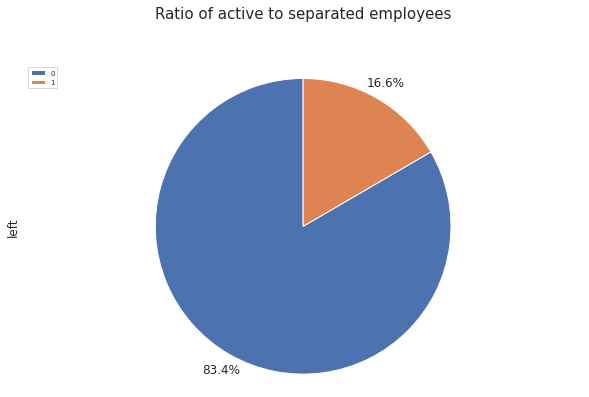

In [90]:
group1.plot(kind='pie',figsize=(10, 6),autopct='%1.1f%%', startangle=90, labels=None, pctdistance=1.12)

plt.title('Ratio of active to separated employees', y=1.12, fontsize = 15) 
plt.axis('equal') 
plt.legend(labels=group1.index, loc='upper left', fontsize=7)

plt.show()

### Data visualizations

In [20]:
df0.head()

,satisfaction_level,last_evaluation,number_project,avg_hours,time_spend,work_accident,left,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

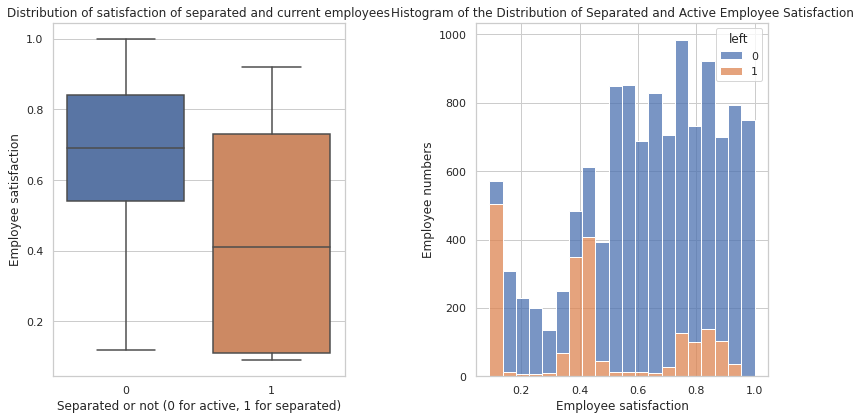

In [21]:
# 设置图形风格
sns.set(style="whitegrid")

# 创建一个包含两个子图的画布
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 绘制箱线图
sns.boxplot(x='left', y='satisfaction_level', data=df0, ax=axes[0])
axes[0].set_xlabel('Separated or not (0 for active, 1 for separated)')
axes[0].set_ylabel('Employee satisfaction')
axes[0].set_title('Distribution of satisfaction of separated and current employees')

# 绘制直方图
sns.histplot(df0, x='satisfaction_level', hue='left',
             multiple='stack', bins=20, kde=False, ax=axes[1])
axes[1].set_xlabel('Employee satisfaction')
axes[1].set_ylabel('Employee numbers')
axes[1].set_title('Histogram of the Distribution of Separated and Active Employee Satisfaction')

# 调整子图布局
plt.tight_layout()

# 显示图形
plt.show()

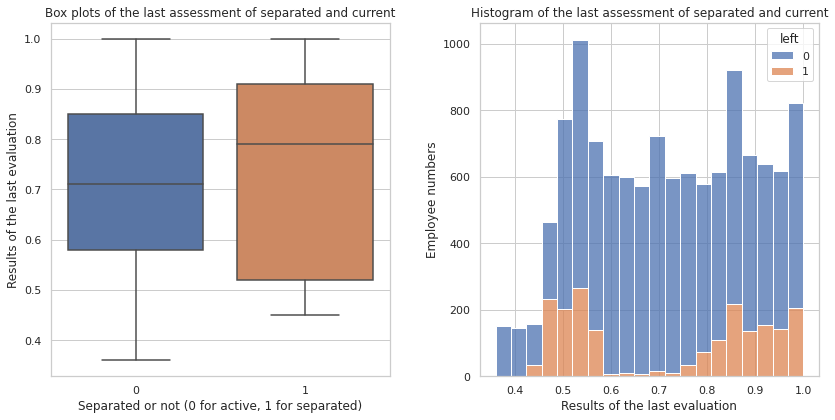

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###

# 创建一个包含两个子图的画布
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 绘制箱线图
sns.boxplot(x='left', y='last_evaluation', data=df0, ax=axes[0])
axes[0].set_xlabel('Separated or not (0 for active, 1 for separated)')
axes[0].set_ylabel('Results of the last evaluation')
axes[0].set_title('Box plots of the last assessment of separated and current')

# 绘制直方图
sns.histplot(df0, x='last_evaluation', hue='left',
             multiple='stack', bins=20, kde=False, ax=axes[1])
axes[1].set_xlabel('Results of the last evaluation')
axes[1].set_ylabel('Employee numbers')
axes[1].set_title('Histogram of the last assessment of separated and current')

# 调整子图布局
plt.tight_layout()

# 显示图形
plt.show()

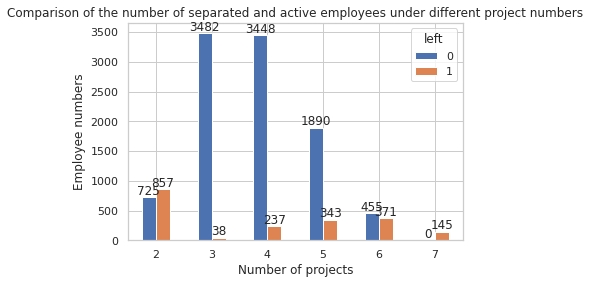

In [23]:
# 统计不同项目数量下离职和在职员工的数量
cross_tab = pd.crosstab(df0['number_project'], df0['left'])

# 绘制柱状图
ax = cross_tab.plot(kind='bar')
plt.xlabel('Number of projects')
plt.ylabel('Employee numbers')
plt.title('Comparison of the number of separated and active employees under different project numbers')
plt.xticks(rotation=0)
# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(height, (x + width/2, y + height), ha='center', va='bottom')

plt.show()

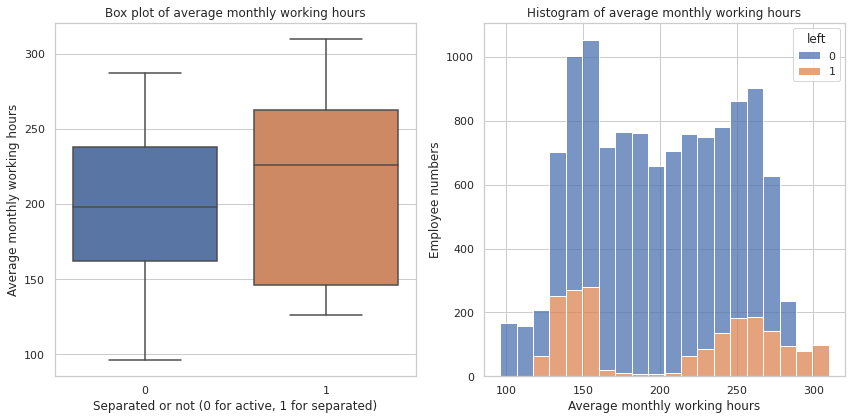

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 绘制箱线图
sns.boxplot(x='left', y='avg_hours', data=df0, ax=axes[0])
axes[0].set_xlabel('Separated or not (0 for active, 1 for separated)')
axes[0].set_ylabel('Average monthly working hours')
axes[0].set_title('Box plot of average monthly working hours')

# 绘制直方图
sns.histplot(df0, x='avg_hours', hue='left', multiple='stack', bins=20, kde=False, ax=axes[1])
axes[1].set_xlabel('Average monthly working hours')
axes[1].set_ylabel('Employee numbers')
axes[1].set_title('Histogram of average monthly working hours')

# 调整子图布局
plt.tight_layout()

# 显示图形
plt.show()

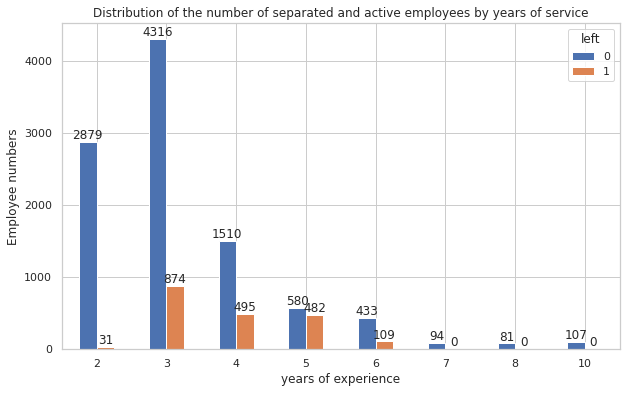

In [25]:
# 统计不同工作年限和是否离职的交叉表
cross_tab = pd.crosstab(df0['time_spend'], df0['left'])

# 绘制堆叠柱状图
ax = cross_tab.plot(kind='bar', figsize=(10, 6))
plt.xlabel('years of experience')
plt.xticks(rotation=0)
plt.ylabel('Employee numbers')
plt.title('Distribution of the number of separated and active employees by years of service')

# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(height, (x + width/2, y + height), ha='center', va='bottom')

plt.show()

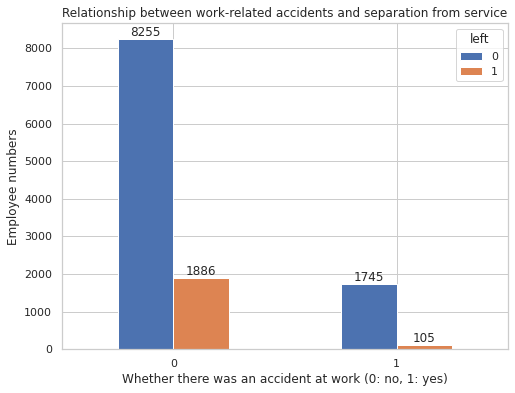

In [26]:
# 构建列联表
cross_tab = pd.crosstab(df0['work_accident'], df0['left'])

# 绘制堆叠柱状图
ax = cross_tab.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Whether there was an accident at work (0: no, 1: yes)')
plt.xticks(rotation=0)
plt.ylabel('Employee numbers')
plt.title('Relationship between work-related accidents and separation from service')

# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(height, (x + width/2, y + height), ha='center', va='bottom')

plt.show()

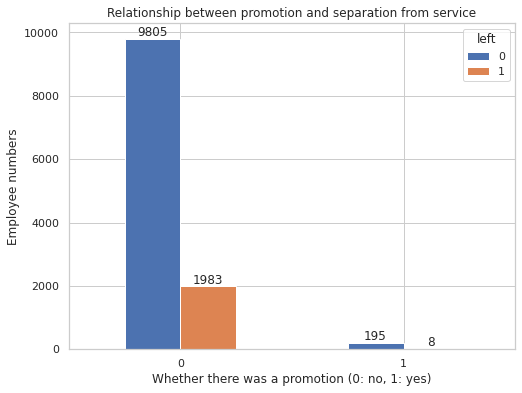

In [27]:
# 构建列联表
cross_tab = pd.crosstab(df0['promotion'], df0['left'])

# 绘制堆叠柱状图
ax = cross_tab.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Whether there was a promotion (0: no, 1: yes)')
plt.xticks(rotation=0)
plt.ylabel('Employee numbers')
plt.title('Relationship between promotion and separation from service')

# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(height, (x + width/2, y + height), ha='center', va='bottom')

plt.show()

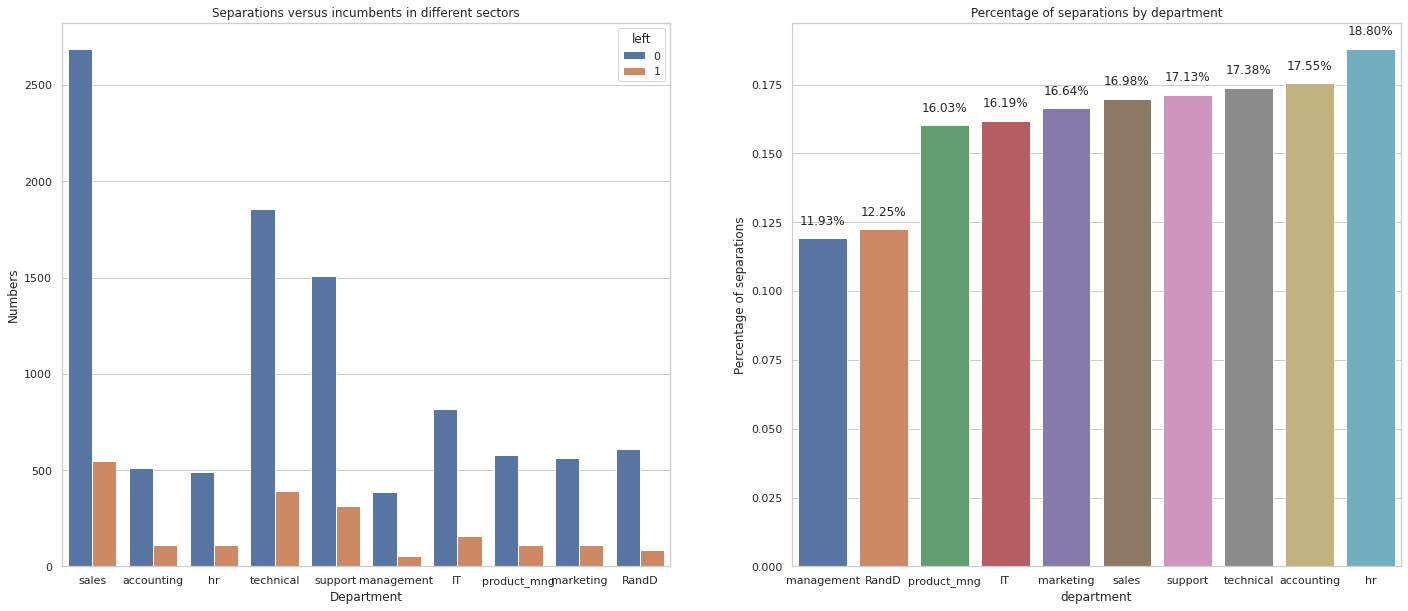

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###
group3 = df0.groupby('Department')['left'].agg(['sum', 'count'])
group3['attrition_rate'] = group3['sum'] / group3['count']
group3 = group3.sort_values(by='attrition_rate', ascending='False').reset_index()

fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# 绘制箱线图
sns.countplot(x='Department', hue='left', data=df0, ax=axes[0])
axes[0].set_title('Separations versus incumbents in different sectors')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Numbers')

sns.barplot(x='Department', y='attrition_rate', data=group3, ax=axes[1])

for i, v in enumerate(group3['attrition_rate']):
    plt.text(i, v + 0.005, f'{v:.2%}', ha='center')

axes[1].set_title('Percentage of separations by department')
axes[1].set_xlabel('department')
axes[1].set_ylabel('Percentage of separations')

plt.show()

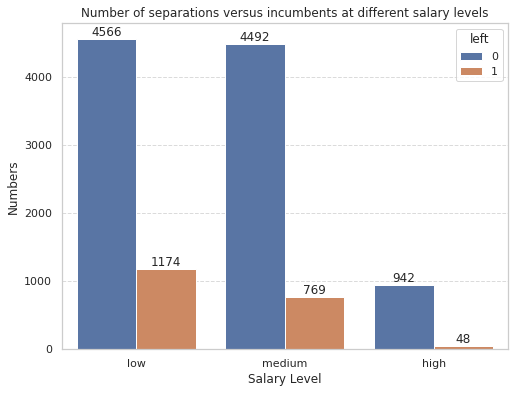

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###
# 创建图像
# 创建图像
plt.figure(figsize=(8, 6))

# 绘制 countplot 图
ax = sns.countplot(x='salary', hue='left', data=df0)

# 添加标题和轴标签
plt.title('Number of separations versus incumbents at different salary levels')
plt.xlabel('Salary Level')  # 修改为 'Salary Level' 更符合语义
plt.ylabel('Numbers')

# 添加网格
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 仅在 y 轴方向添加网格线

# 手动添加数据标签
for container in ax.containers:
    # 获取每个柱子的高度
    heights = [p.get_height() for p in container]
    # 在每个柱子上方添加文本标签
    for i, height in enumerate(heights):
        if height > 0:  # 只对非零高度的柱子添加标签
            ax.text(container[i].get_x() + container[i].get_width() / 2,  # x 坐标
                    height + 0.1,  # y 坐标（稍微偏移柱子顶部）
                    f'{int(height)}',  # 标签内容
                    ha='center',  # 水平居中对齐
                    va='bottom')  # 垂直底部对齐

# 显示图像
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

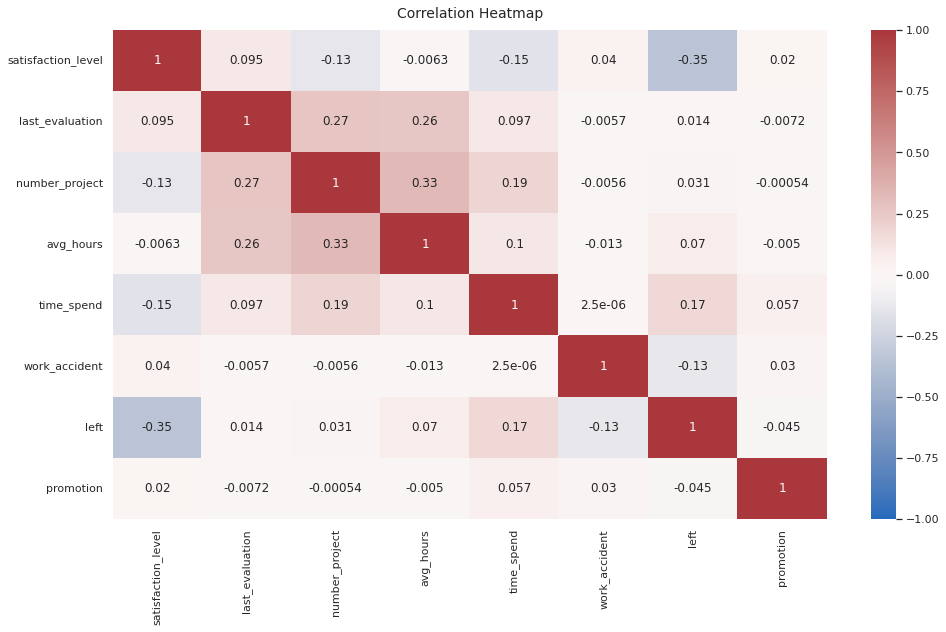

In [30]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [31]:
### YOUR CODE HERE ###
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit
from xgboost import XGBClassifier
from xgboost import plot_importance
import pickle

In [32]:
df1 = df0.copy()

In [33]:
ordinal_encoder = OrdinalEncoder() 
df1['salary'] = ordinal_encoder.fit_transform(df1[['salary']])

In [34]:
OH_encoder = OneHotEncoder(handle_unknown='error', sparse=False, drop='first')
encoded_result = pd.DataFrame(
    OH_encoder.fit_transform(df1[['Department']]),
    columns=OH_encoder.get_feature_names()  
)

df1.index = encoded_result.index
df1 = df1.drop('Department', axis=1)
df1 = pd.concat([df1, encoded_result], axis=1)

In [35]:
scaler = StandardScaler()
num_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'avg_hours', 'time_spend']
df1[num_features] = scaler.fit_transform(df1[num_features])

In [36]:
df1.head()

,satisfaction_level,last_evaluation,number_project,avg_hours,time_spend,work_accident,left,promotion,salary,x0_RandD,x0_accounting,x0_hr,x0_management,x0_marketing,x0_product_mng,x0_sales,x0_support,x0_technical
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.706637,0.851380,1.029194,1.262709,1.981036,0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-2.155721,0.970190,2.748604,1.467939,0.477485,0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.374770,0.910785,1.029194,0.462311,1.229261,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
X1 = df1[['satisfaction_level','last_evaluation','number_project','avg_hours','time_spend','work_accident','promotion','salary']]
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
# X.values 将 X 这个 DataFrame 对象转换为 numpy 数组，这样可以作为 variance_inflation_factor 函数的输入。
# X.shape[1] 表示 X 的列数，也就是自变量的数量。for i in range(X.shape[1]) 会遍历每个自变量的索引。
# variance_inflation_factor(X.values, i) 会计算 X 中第 i 个自变量的 VIF。
df_vif = pd.DataFrame(vif, index=X1.columns, columns = ['VIF'])

df_vif

,VIF
satisfaction_level,1.061155
last_evaluation,1.144706
number_project,1.223658
avg_hours,1.168889
time_spend,1.065617
work_accident,1.147808
promotion,1.020481
salary,1.155882


In [38]:
X = df1.drop('left', axis=1)
y = df1["left"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [39]:
#rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,4,6],
             'n_estimators': [75, 100, 125, 150]
             }  

#scoring = {'accuracy', 'precision', 'recall', 'f1'}

#rf_val = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [40]:
#rf_val.fit(X_train, y_train)

In [41]:
path = '/home/jovyan/work/'
# 保存模型
#with open(path+'rf_val_model.pickle', 'wb') as to_write:
#    pickle.dump(rf_val, to_write)

In [42]:
with open(path+'rf_val_model.pickle', 'rb') as to_read:
    rf_val = pickle.load(to_read)

In [43]:
rf_val.best_params_

{'max_depth': None,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 75}

In [44]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
  
    return table

In [45]:
rf_val_results = make_results('Random Forest Validated', rf_val)
rf_val_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest Validated,0.955212,0.921014,0.992129,0.985656


In [46]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot()
    plt.show()

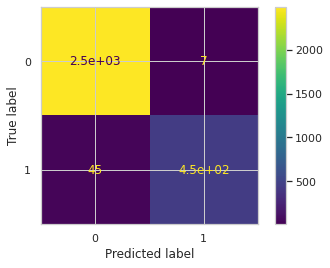

In [47]:
conf_matrix_plot(rf_val, X_test, y_test)

In [48]:
def feature_importances(model, X):

    feat_impt = model.best_estimator_.feature_importances_

    # Get indices of top 10 features
    ind = np.argpartition(model.best_estimator_.feature_importances_, -10)[-10:]

    # Get column labels of top 10 features 
    feat = X.columns[ind]

    # Filter `feat_impt` to consist of top 10 feature importances
    feat_impt = feat_impt[ind]

    y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
    y_sort_df = y_df.sort_values("Importance")
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

    ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
    ax1.set_ylabel("Feature")
    ax1.set_xlabel("Importance")

    plt.show()

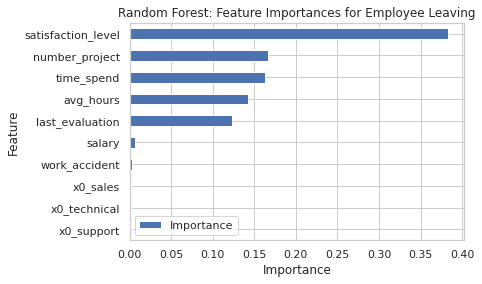

In [49]:
feature_importances(rf_val, X)

In [50]:
df0.head()

,satisfaction_level,last_evaluation,number_project,avg_hours,time_spend,work_accident,left,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [51]:
df2 = df0.drop('satisfaction_level', axis=1)

In [52]:
df2['salary'] = ordinal_encoder.transform(df2[['salary']])

In [53]:
encoded_result = pd.DataFrame(
    OH_encoder.transform(df2[['Department']]),
    columns=OH_encoder.get_feature_names()  
)

df2.index = encoded_result.index
df2 = df2.drop('Department', axis=1)
df2 = pd.concat([df2, encoded_result], axis=1)

In [54]:
scaler1 = StandardScaler()
num_features = ['last_evaluation', 'number_project', 'avg_hours', 'time_spend']
df2[num_features] = scaler1.fit_transform(df2[num_features])

In [55]:
df2.head()

,last_evaluation,number_project,avg_hours,time_spend,work_accident,left,promotion,salary,x0_RandD,x0_accounting,x0_hr,x0_management,x0_marketing,x0_product_mng,x0_sales,x0_support,x0_technical
0,-1.108990,-1.549921,-0.892208,-0.274291,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.851380,1.029194,1.262709,1.981036,0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.970190,2.748604,1.467939,0.477485,0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.910785,1.029194,0.462311,1.229261,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.168396,-1.549921,-0.851162,-0.274291,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
X1 = df2.drop('left', axis=1)
y1 = df2["left"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.25, random_state=42)

In [57]:
#rf = RandomForestClassifier(random_state=0)
cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,4,6],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

#rf_val1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [58]:
#rf_val1.fit(X_train1, y_train1)

In [59]:
path = '/home/jovyan/work/'
# 保存模型
#with open(path+'rf_val1_model.pickle', 'wb') as to_write:
#    pickle.dump(rf_val1, to_write)

In [60]:
with open(path+'rf_val1_model.pickle', 'rb') as to_read:
    rf_val1 = pickle.load(to_read)

In [61]:
rf_val1.best_params_

{'max_depth': None,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 125}

In [62]:
rf_val1_results = make_results('Random Forest Validated1', rf_val1)
rf_val1_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest Validated1,0.922855,0.900923,0.946205,0.974981


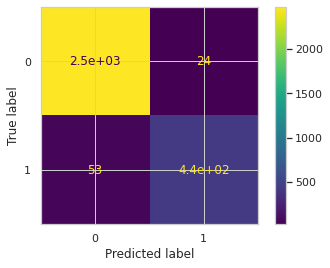

In [63]:
conf_matrix_plot(rf_val1, X_test1, y_test1)

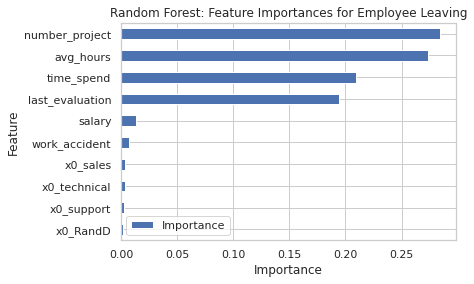

In [64]:
feature_importances(rf_val1, X1)

In [65]:
df0.head()

,satisfaction_level,last_evaluation,number_project,avg_hours,time_spend,work_accident,left,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [66]:
df3 = df0.copy()

In [67]:
df3['workload'] = df3['number_project'] * df3['avg_hours']

In [68]:
df3['Department_workload_mean'] = df3.groupby('Department')['workload'].transform('mean')

In [69]:
df3['Workload index'] = df3['workload']/df3['Department_workload_mean']

In [70]:
df3.drop(['workload','Department_workload_mean','satisfaction_level'], axis =1, inplace = True)

In [71]:
df3.head()

,last_evaluation,number_project,avg_hours,time_spend,work_accident,left,promotion,Department,salary,Workload index
0,0.53,2,157,3,0,1,0,sales,low,0.405452
1,0.86,5,262,6,0,1,0,sales,medium,1.691534
2,0.88,7,272,4,0,1,0,sales,medium,2.458534
3,0.87,5,223,5,0,1,0,sales,low,1.439740
4,0.52,2,159,3,0,1,0,sales,low,0.410617


In [72]:
df3.describe()

,last_evaluation,number_project,avg_hours,time_spend,work_accident,left,promotion,Workload index
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,1.000000
std,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.453862
min,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.247919
25%,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.682239
50%,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.933572
75%,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,1.262465
max,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.874597


In [73]:
df3['salary'] = ordinal_encoder.transform(df3[['salary']])

In [74]:
encoded_result = pd.DataFrame(
    OH_encoder.transform(df3[['Department']]),
    columns=OH_encoder.get_feature_names()  
)

df3.index = encoded_result.index
df3 = df3.drop('Department', axis=1)
df3 = pd.concat([df3, encoded_result], axis=1)

In [75]:
scaler2 = StandardScaler()
num_features = ['last_evaluation', 'number_project', 'avg_hours', 'time_spend', 'Workload index']
df3[num_features] = scaler2.fit_transform(df3[num_features])

In [76]:
df3.head()

,last_evaluation,number_project,avg_hours,time_spend,work_accident,left,promotion,salary,Workload index,x0_RandD,x0_accounting,x0_hr,x0_management,x0_marketing,x0_product_mng,x0_sales,x0_support,x0_technical
0,-1.108990,-1.549921,-0.892208,-0.274291,0,1,0,1.0,-1.310031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.851380,1.029194,1.262709,1.981036,0,1,0,2.0,1.523728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.970190,2.748604,1.467939,0.477485,0,1,0,2.0,3.213741,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.910785,1.029194,0.462311,1.229261,0,1,0,1.0,0.968926,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.168396,-1.549921,-0.851162,-0.274291,0,1,0,1.0,-1.298650,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
X2 = df3.drop('left', axis=1)
y2 = df3["left"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.25, random_state=42)

In [78]:
#rf = RandomForestClassifier(random_state=0)
cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,4,6],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

#rf_val2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [79]:
#rf_val2.fit(X_train2, y_train2)

In [80]:
path = '/home/jovyan/work/'
# 保存模型
#with open(path+'rf_val2_model.pickle', 'wb') as to_write:
#    pickle.dump(rf_val2, to_write)

In [81]:
with open(path+'rf_val2_model.pickle', 'rb') as to_read:
    rf_val2 = pickle.load(to_read)

In [82]:
rf_val2.best_params_

{'max_depth': None,
 'max_features': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 150}

In [83]:
rf_val2_results = make_results('Random Forest Validated2', rf_val2)
rf_val2_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest Validated2,0.925844,0.906289,0.946449,0.975871


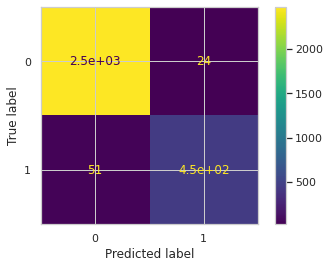

In [84]:
conf_matrix_plot(rf_val2, X_test2, y_test2)

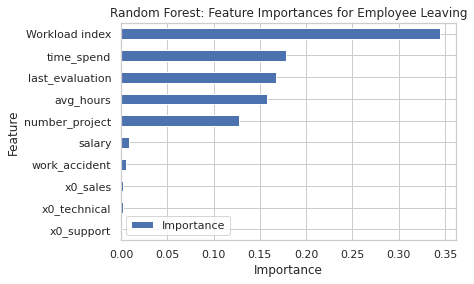

In [85]:
feature_importances(rf_val2, X2)

In [86]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

In [87]:
#xgb.fit(X_train2, y_train2)

In [88]:
with open(path+'xgb_model.pickle', 'rb') as to_read:
    xgb = pickle.load(to_read)

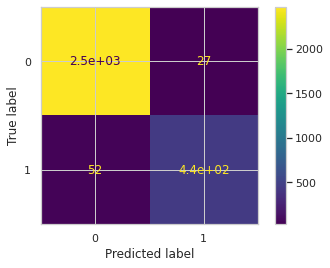

In [89]:
conf_matrix_plot(xgb, X_test2, y_test2)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.